In [1]:
import pandas 
pandas.set_option('display.max_colwidth', -1)
pandas.options.display.max_columns = None     ## Columns
pandas.options.display.max_rows = None
import matplotlib.pyplot
import pylab
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler,MinMaxScaler



from sklearn import linear_model



from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [2]:
df =  pandas.read_csv('Online Hotel Booking Prediction.csv')

In [3]:
df.shape

(595848, 37)

In [4]:
df.head(5)

,id,yyear,week_of_year,advertiser_id,market,hotel_id,clicks,cost,bookings,top_pos,beat,meet,lose,impressions,city_id,stars,rating,distance_to_city_centre,poi_image,longitude,latitude,last_renovation,spa_hotel,country_hotel,convention_hotel,beach_front_hotel,luxury_hotel,city_hotel_centrally_located,health_resortrehab_hotel,club_club_hotel,airport_hotel,senior_hotel,eco_friendly_hotel,family_hotel,total_images,total_hq_images,advertiser_connections
0,201716IM512425060,2017,16,5124,IM,25060,2,1104,0,1,1.0,4388.0,988.0,5309,39332,3,1000.0,1570,0,-1.885049,52.470711,2012.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,105,41,269
1,20176IM135625060,2017,6,1356,IM,25060,34,33281,11,174,37.0,11634.0,1802.0,13455,39332,3,1000.0,1570,0,-1.885049,52.470711,2012.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,105,41,269
2,201728IM512425060,2017,28,5124,IM,25060,3,2001,0,0,24.0,3975.0,2719.0,6666,39332,3,1000.0,1570,0,-1.885049,52.470711,2012.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,105,41,269
3,201726IM135625060,2017,26,1356,IM,25060,218,282394,21,1467,55.0,5182.0,1256.0,6444,39332,3,1000.0,1570,0,-1.885049,52.470711,2012.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,105,41,269
4,201737IM107125060,2017,37,1071,IM,25060,5,4600,0,42,NaN,NaN,NaN,5428,39332,3,1000.0,1570,0,-1.885049,52.470711,2012.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,105,41,269


In [5]:
df.shape

(595848, 37)

In [6]:
df.isnull().sum() * 100 / len(df)

id                              0.000000 
yyear                           0.000000 
week_of_year                    0.000000 
advertiser_id                   0.000000 
market                          0.000000 
hotel_id                        0.000000 
clicks                          0.000000 
cost                            0.000000 
bookings                        0.000000 
top_pos                         0.000000 
beat                            8.788986 
meet                            8.788986 
lose                            8.788986 
impressions                     0.000000 
city_id                         0.000000 
stars                           0.000000 
rating                          9.041903 
distance_to_city_centre         0.000000 
poi_image                       0.000000 
longitude                       0.000000 
latitude                        0.000000 
last_renovation                 59.745271
spa_hotel                       81.319061
country_hotel                   92

In [7]:
dropped_column = ['id','advertiser_id','hotel_id','city_id','last_renovation','spa_hotel','country_hotel','convention_hotel',
            'beach_front_hotel','luxury_hotel','city_hotel_centrally_located','health_resortrehab_hotel',
            'club_club_hotel','airport_hotel','senior_hotel','eco_friendly_hotel','family_hotel','longitude','latitude','yyear',
                 'week_of_year','market','poi_image']
df= df.drop(columns=dropped_column) 

In [8]:
df.head(10)

,clicks,cost,bookings,top_pos,beat,meet,lose,impressions,stars,rating,distance_to_city_centre,total_images,total_hq_images,advertiser_connections
0,2,1104,0,1,1.0,4388.0,988.0,5309,3,1000.0,1570,105,41,269
1,34,33281,11,174,37.0,11634.0,1802.0,13455,3,1000.0,1570,105,41,269
2,3,2001,0,0,24.0,3975.0,2719.0,6666,3,1000.0,1570,105,41,269
3,218,282394,21,1467,55.0,5182.0,1256.0,6444,3,1000.0,1570,105,41,269
4,5,4600,0,42,NaN,NaN,NaN,5428,3,1000.0,1570,105,41,269
5,25,23506,7,258,3.0,6364.0,39.0,6406,3,1000.0,1570,105,41,269
6,8,8441,0,10,8.0,3663.0,860.0,4494,3,1000.0,1570,105,41,269
7,522,730227,60,6060,0.0,45.0,9370.0,9340,3,1000.0,1570,105,41,269
8,1,460,0,0,9.0,29.0,3641.0,3350,3,1000.0,1570,105,41,269
9,191,276782,63,2833,1.0,58.0,6631.0,6688,3,1000.0,1570,105,41,269


In [9]:
df.dtypes

clicks                     int64  
cost                       int64  
bookings                   int64  
top_pos                    int64  
beat                       float64
meet                       float64
lose                       float64
impressions                int64  
stars                      int64  
rating                     float64
distance_to_city_centre    int64  
total_images               int64  
total_hq_images            int64  
advertiser_connections     int64  
dtype: object

Scatterplot of : cost
0.7223951695577976


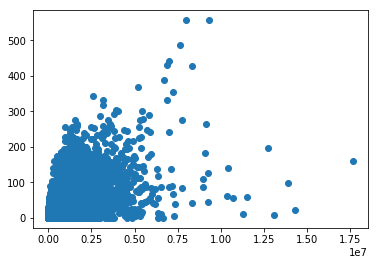

Scatterplot of : bookings
0.9999999999999998


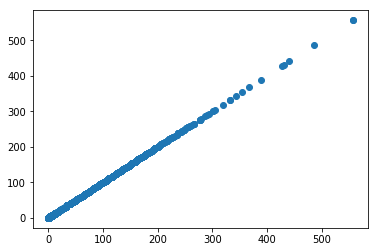

Scatterplot of : top_pos
0.6782417136715033


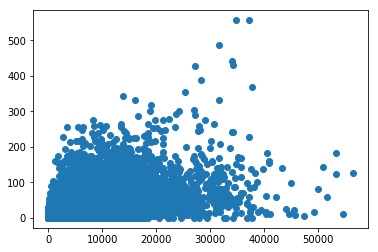

Scatterplot of : beat
0.14908150855256702


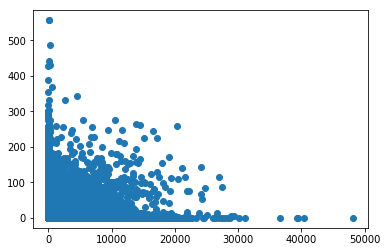

Scatterplot of : meet
0.250169242577478


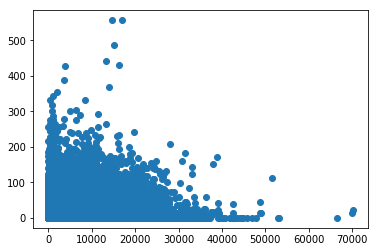

Scatterplot of : lose
0.08602582545811875


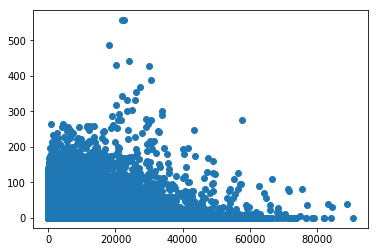

Scatterplot of : impressions
0.2184701335599832


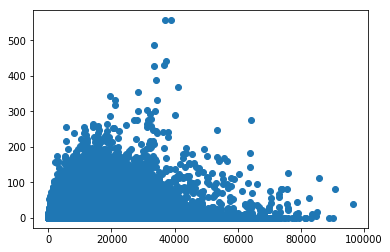

Scatterplot of : stars
-0.06040700319703939


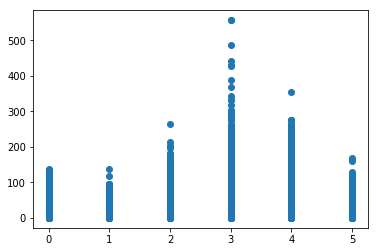

Scatterplot of : rating
-0.023005004874302033


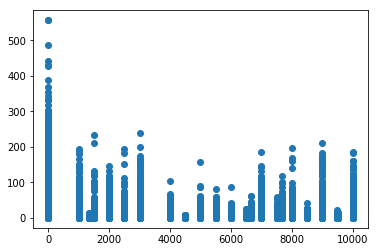

Scatterplot of : distance_to_city_centre
-0.011394405129244828


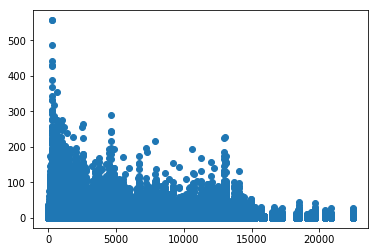

Scatterplot of : total_images
-0.06870523891191149


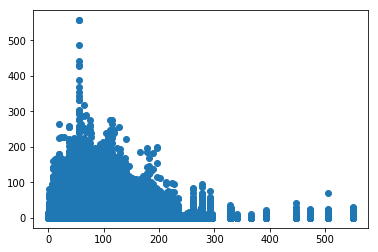

Scatterplot of : total_hq_images
-0.05953387509637186


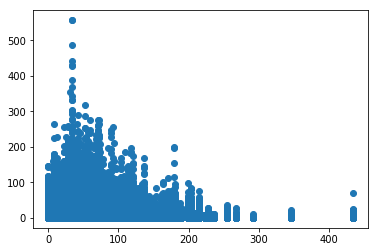

Scatterplot of : advertiser_connections
-0.051232961408870625


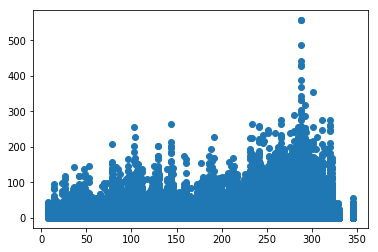

In [10]:
for i in df.columns[1:]:
    print('Scatterplot of :',i)
    y = df.bookings
    x = df[i]
    print(y.corr(x))
    matplotlib.pyplot.scatter(x,y)

    matplotlib.pyplot.show()
    
    
    

In [11]:
df.isnull().sum()

clicks                     0    
cost                       0    
bookings                   0    
top_pos                    0    
beat                       52369
meet                       52369
lose                       52369
impressions                0    
stars                      0    
rating                     53876
distance_to_city_centre    0    
total_images               0    
total_hq_images            0    
advertiser_connections     0    
dtype: int64

In [12]:
df['beat'] = df['beat'].fillna(df['beat'].mean())
df['meet'] = df['meet'].fillna(df['meet'].mean())
df['lose'] = df['lose'].fillna(df['lose'].mean())
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [ ]:
########################################################################################################################

In [13]:
# Split-out validation dataset
X = df.drop(columns=['bookings']).values
Y = df['bookings'].values
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_Columns=df.select_dtypes(include=numerics).drop(columns=['bookings']).columns
validation_size = 0.30
seed = 100
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,Y_train)

# Make predictions using the testing set
y_pred_test = regr.predict(X_test)
y_pred_train = regr.predict(X_train)

print('____________________________________________________________________________\n\n')
print('TEST RESULTS\n')
# The coefficients
print('Coefficients: \n', regr.coef_)

print('\n')
# The mean squared error
print("Mean squared error: %.2f\n"
      % mean_squared_error(Y_test, y_pred_test))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f\n' % r2_score(Y_test, y_pred_test))

print('r2:',r2_score(Y_test, y_pred_test) )
print('____________________________________________________________________________\n\n')

print('TRAIN RESULTS\n')

# The coefficients
print('Coefficients: \n', regr.coef_)
print('\n')
# The mean squared error
print("Mean squared error: %.2f\n"
      % mean_squared_error(Y_train, y_pred_train))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f\n' % r2_score(Y_train, y_pred_train))
print('r2:',r2_score(Y_train, y_pred_train))

____________________________________________________________________________


TEST RESULTS

Coefficients: 
 [ 4.91627798e+02 -2.48194293e+02  3.18708962e+01  1.94395964e+01
 -4.82909605e+00 -7.31968761e+00  2.30511177e+00 -2.30666814e+00
 -3.45737680e-01  1.09471743e-01 -4.39048276e+00  1.16629349e+00
 -1.21524694e-01]


Mean squared error: 46.19

Variance score: 0.62

r2: 0.6160042339395896
____________________________________________________________________________


TRAIN RESULTS

Coefficients: 
 [ 4.91627798e+02 -2.48194293e+02  3.18708962e+01  1.94395964e+01
 -4.82909605e+00 -7.31968761e+00  2.30511177e+00 -2.30666814e+00
 -3.45737680e-01  1.09471743e-01 -4.39048276e+00  1.16629349e+00
 -1.21524694e-01]


Mean squared error: 42.32

Variance score: 0.62

r2: 0.6161506864335764
